In [1]:
# importations des différentes librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# df : dfframe c'est l'ensemble du jeu des données
df = pd.read_csv('dataset\Healthcare-Diabetes.csv', sep=",")

In [3]:
df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# suppression de la colonne id
df.drop('Id', axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [4]:
df.shape

(2768, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.duplicated().sum()

3854

In [10]:
df.groupby('diabetes').count()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,91500,91500,91500,91500,91500,91500,91500,91500
1,8500,8500,8500,8500,8500,8500,8500,8500


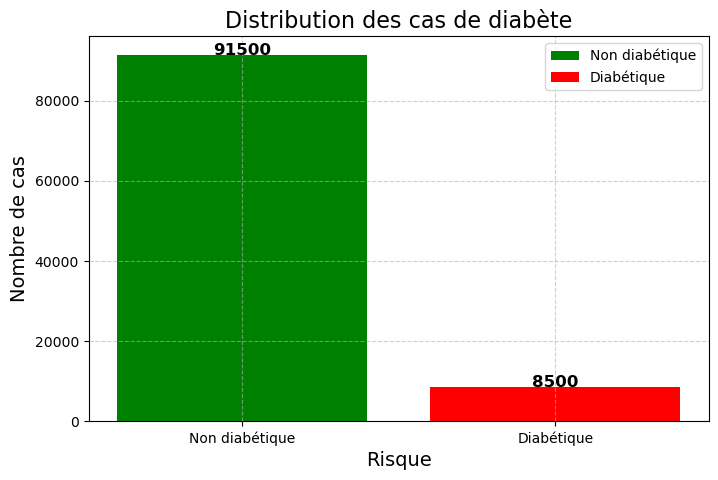

In [11]:

# Compter les occurrences pour chaque classe
Classifier = df['diabetes'].value_counts()

color = {0:'green', 1:'red' }

# Créer le graphique
plt.figure(figsize=(8, 5))

# Boucle pour créer chaque barre et ajouter les labels
for i, (label, y) in enumerate(Classifier.items()):
    plt.bar(x=label, height=y,color=color[label],label='Diabétique' if label == 1 else 'Non diabétique')
    plt.text(x=label, y=y + 5, s=str(y), ha='center', fontsize=12, fontweight='bold')

# Ajouter le titre et les axes
plt.title('Distribution des cas de diabète', fontsize=16)
plt.xlabel("Risque", fontsize=14)
plt.ylabel("Nombre de cas", fontsize=14)
plt.xticks([0, 1], labels=['Non diabétique', 'Diabétique'])
plt.grid(True, linestyle='--', alpha=0.6)

# Ajouter la légende
plt.legend()

# Afficher le graphique
plt.show()


AttributeError: Rectangle.set() got an unexpected keyword argument 'X'

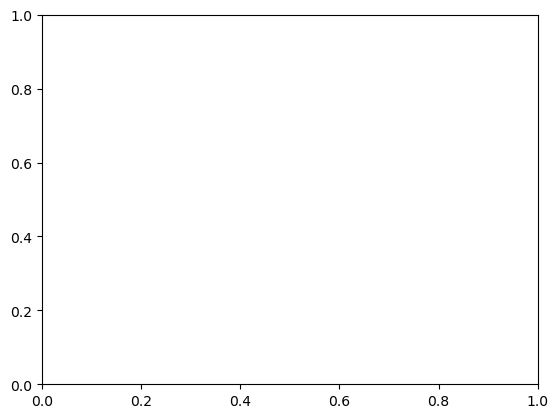

In [33]:
sn.barplot(df,X=df['smoking_history'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


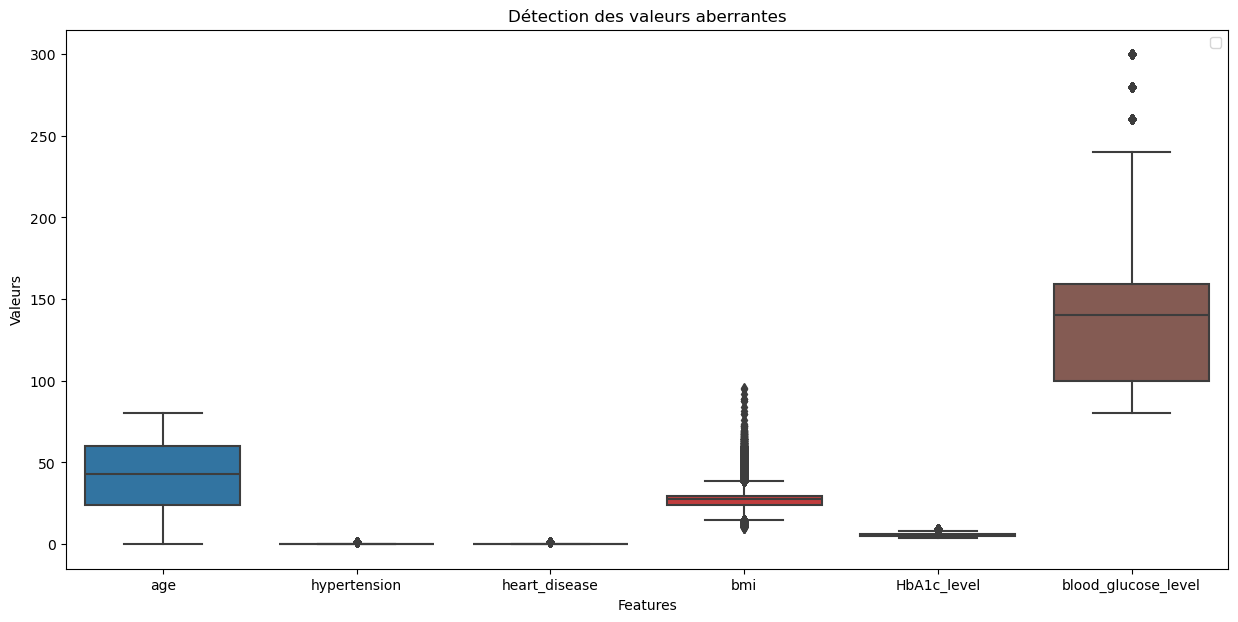

In [13]:
plt.figure(figsize=(15,7))
sn.boxplot(df.iloc[:,:-1])
plt.title("Détection des valeurs aberrantes")
plt.xlabel('Features')
plt.ylabel('Valeurs')
plt.legend() 
plt.show()

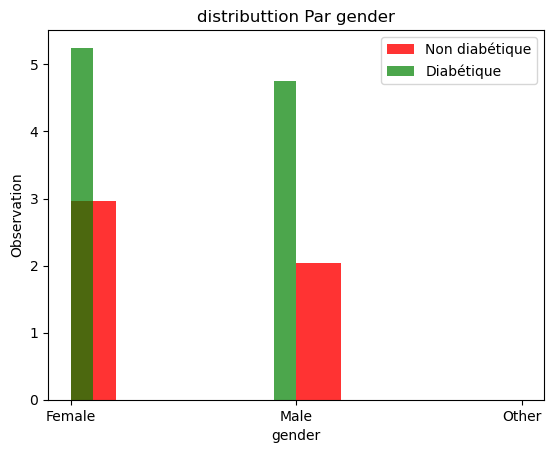

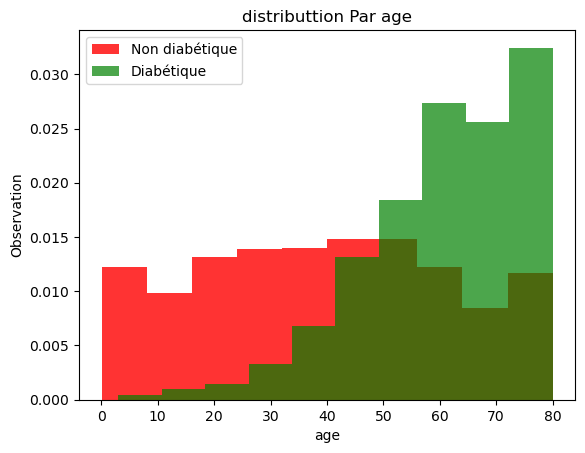

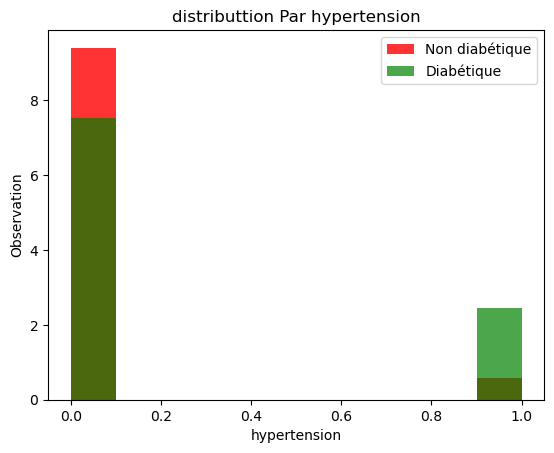

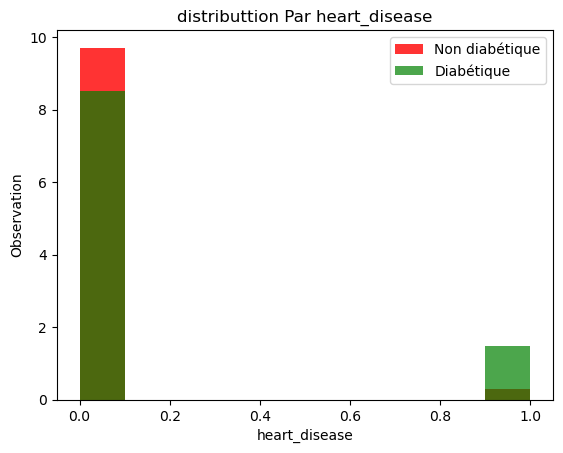

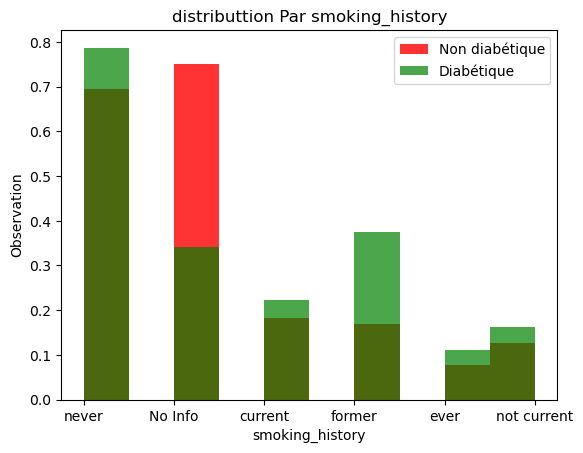

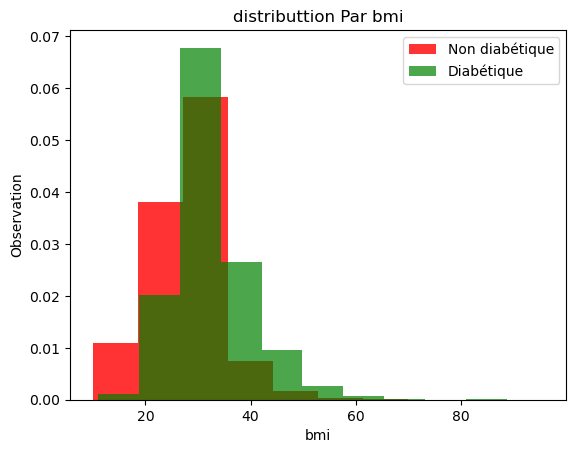

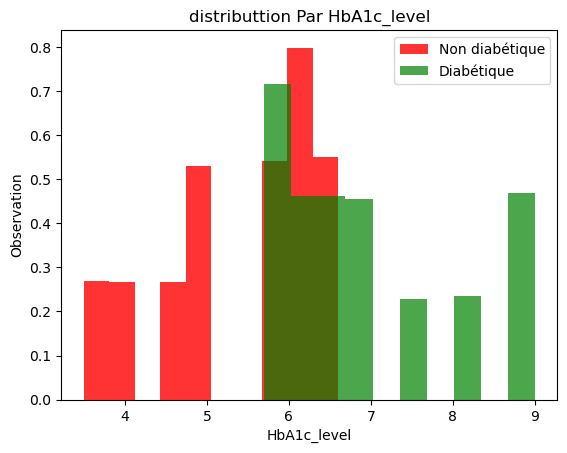

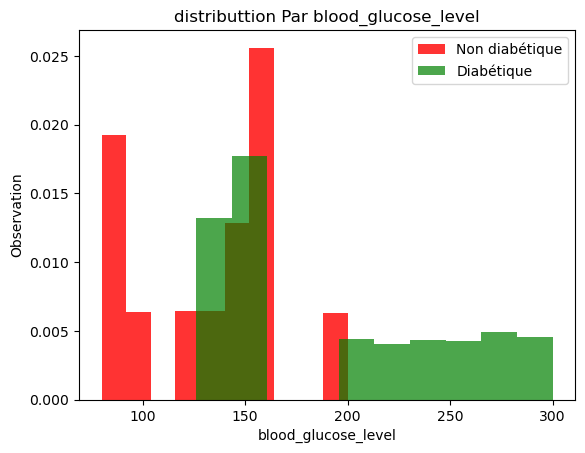

In [14]:
risk= ['Non diabétique', 'Diabétique']
for  label in df.columns[:-1]:
    plt.hist(df[df['diabetes']==0][label], label=risk[0], color="red", histtype='bar', alpha=0.8, density=True)
    plt.hist(df[df['diabetes']==1][label], label=risk[1], color="green", histtype='bar', alpha=0.7, density=True)
    plt.title(f'distributtion Par {label}')
    plt.xlabel(label)
    plt.ylabel('Observation')
    plt.legend()
    plt.show()

In [34]:
# label encoding 
en = LabelEncoder()
df['gender'] = en.fit_transform(df['gender'])
df['smoking_history']= en.fit_transform(df['smoking_history'])

In [35]:
df.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
63445,0,25.0,0,0,0,56.15,6.2,100,0
51689,0,34.0,1,0,4,27.32,6.1,145,1
72462,1,32.0,0,0,2,33.11,6.2,159,0
75322,1,8.0,0,0,0,23.27,4.0,100,0
31163,1,57.0,0,0,5,24.36,4.5,130,0
98208,1,45.0,1,0,1,35.53,5.8,158,0
97055,1,80.0,0,1,4,24.78,6.2,200,0
52552,1,78.0,0,0,0,35.49,4.5,155,0
97096,0,59.0,0,0,1,29.28,3.5,80,0
49859,0,54.0,0,0,3,41.15,5.7,126,0


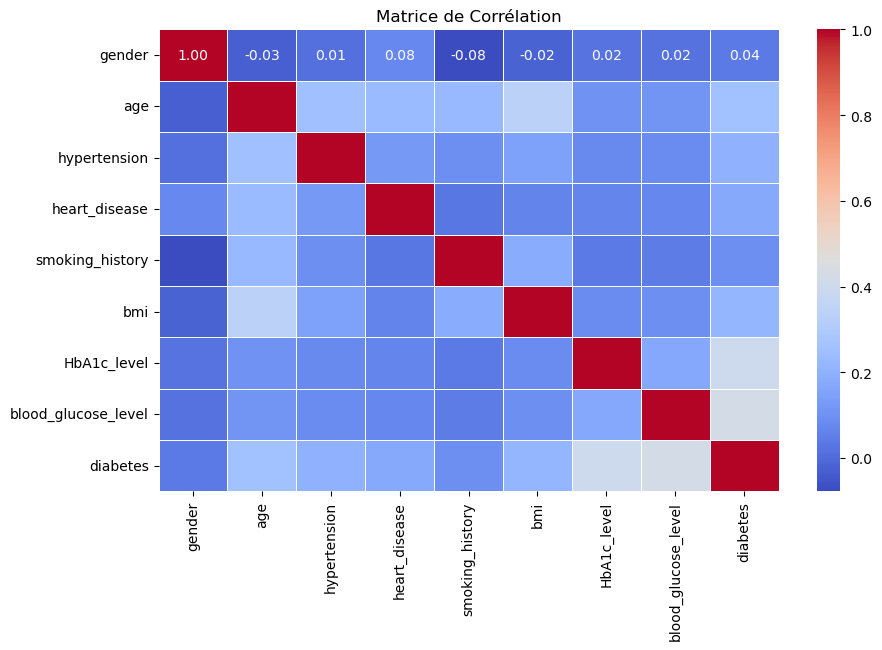

In [36]:
# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Créer la heatmap
sn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajouter le titre
plt.title('Matrice de Corrélation')

# Afficher la heatmap
plt.show()


In [18]:
def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw , uw

In [19]:
for i in df.select_dtypes(include="number").columns:
    lw , uw = wisker(df[i])
    df[i] = np.where(df[i] < lw, lw , df[i])
    df[i] = np.where(df[i] > uw, uw , df[i])

In [37]:
x = df.drop(columns='diabetes') #features
y= df['diabetes'] #target

1

In [40]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)  
# 80% => données d'entrainements
#20% => données de tests

In [42]:
y_train

10382    0
73171    0
30938    0
99310    0
58959    0
        ..
21243    0
45891    0
42613    1
43567    0
68268    0
Name: diabetes, Length: 80000, dtype: int64

In [43]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    Scaler = StandardScaler()
    x = Scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)

    data = np.hstack((x , np.reshape(y, (-1,1))))
    

    return data , x , y, Scaler
    

In [44]:
train= np.hstack((x_train , np.reshape(y_train, (-1,1))))
test= np.hstack((x_test , np.reshape(y_test, (-1,1))))

In [45]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [52]:
train , x_train , y_train, scaler = scale_dataset(train, oversample=True)
test , x_test, y_test, scaler = scale_dataset(test, oversample=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [53]:
pd.DataFrame(y_train).value_counts()

0  
0.0    73203
1.0    73203
Name: count, dtype: int64

In [25]:
Svm_model = SVC()

In [54]:
Svm_model.fit(x_train,y_train)

NameError: name 'Svm_model' is not defined

In [33]:
y_pred_svm=Svm_model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_svm)


0.7922077922077922

In [37]:
Lr_model = LogisticRegression(max_iter=200)
Lr_model.fit(x_train,y_train)
y_pred_Lr=Lr_model.predict(x_test)
accuracy_score(y_test,y_pred_Lr)

0.8181818181818182

In [38]:
Knn_model = KNeighborsClassifier()
Knn_model.fit(x_train,y_train)
y_pred_knn = Knn_model.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.7597402597402597